# Heart Disease Detection
## Context
The dataset is the Heart Disease UCI dataset, which can be obtained from [here](https://www.kaggle.com/ronitf/heart-disease-uci). 

We will build a binary classification model to predict whether a given patient has heart disease or not.

## Basic Exploration
We begin with a shallow read through the features to understand what they are. 

We perform a train-cv-test split and build a naive logistic regression model so we have a performance baseline. 

## Reading the Feature Documentation
According to the documentation, we have the following features:

| Variable Name | Type        | Category   | Expectation | Comments                                                     |
| ------------- | ----------- | ---------- | ----------- | ------------------------------------------------------------ |
| `age`         | Numerical   | Personal   | Medium      | This is the ages in years.<br />Appealing to common sense, we know that health declines as individuals age. It is possible that age increases the risk of heart attack. However, not every elderly individual dies from heart attack. Many die from other illnesses like cancer or die of old age. Age alone is probably insufficient to guarantee a heart attack. |
| `sex`         | Categorical | Personal   | Medium      | This is the gender. A gender of `1` is male, `0` is female<br />Gender might have an effect on heart health. It is possible that because men tend to be given high positions over women, they experience extreme stress due to the responsibilities of these positions. Therefore, these individuals would raise the average risk of health disease in men. |
| `cp`          | Categorical | Subjective | High        | Chest pain type. There are 4 different values for this.<br />This may have a high influence, because a doctor would probably ask the patient to describe their subjective feeling of pain, to distinguish benign chest pain from a genuine heart attack. |
| `trestbps`    | Numerical   | Blood Flow | High        | Resting blood pressure (in mm Hg on admission to the hospital).<br />The documentation for this feature is unclear. It potentially sounds like the measured blood pressure when a patient is admitted to the hospital, due to suspected heart disease. This may be a potential source of target leakage and will hurt model reliability at production. <br />We will make the assumption that our model is being built for doctors, who have a recently admitted patient with an unknown illness, and the doctors wants to quickly diagnose the patient as having a heart disease or not. Hence, this feature will be available at the time of prediction, so we may use it. |
| `chol`        | Numerical   | Chemical   | High        | Serum cholestoral in mg/dl.<br />This feature needs to be used in tandem with other features, otherwise, it may not provide enough information by itself. |
| `fbs`         | Categorical | Chemical   | High        | An indicator that the fasting blood sugar is $> 120$ mg/dl, where `1` indicates `true`.<br />There is no article suggesting a link between blood sugar and heart disease |
| `restecg`     | Categorical?| ECG        | ?           | Resting electorcardiographic result. There are 3 values: 0,1, 2. <br />There is no document for this feature, so it is impossible to determinr relevance. |
| `thalach`     | Numerical   | Blood Flow | Medium      | Maximum heart rate achieved                                  |
| `exang`       | Categorical | Misc       | High        | Exercise induced angina (`1` = yes; `0` = no)                |
| `oldpeak`     | Numerical   | ECG        | High        | ST depression induced by exercise relative to rest.          |
| `slope`       | Numerical   | ECG        | High        | The slope of the peak exercise ST segment<br />"ST segment elevation is regarded as a sign of myocardial ischemia...An upsloping, convex ST segment is highly predictive of a myocardial infarction" |
| `ca`          | Numerical   | Blood Flow | High        | Number of major vessels colored by fluorosopy                |
| `thal`        | Categorical | Misc       | ?           | 3 = normal; 6 = fixed defect; 7 = reversible defect;<br />There is no documentation for this future, so it is impossible to determine relevance. |

The "Type" is either categorical or numerical. 

The "Category" is the domain-specific category we place the feature under. This is only for reference and does not play a major role in the upcoming analysis. 

The "Expectation" is our guess on the relevance of the feature, based on our intuition on how relevant the information is to heart disease, whether . This is ranked on a scale from "Low" (useless; no influence on the target), "Medium" (some influence on the target), and "High" (strong relationship with the target).

The "Comments" for anything worth nothing about the feature

Most of the features appear to be highly relevant to the classification of an illness as a form of heart disease. There is no irrelevant data.

## Context

- **DEF: Chest pain type** - There is no clear documentation on what the individual chest pain types mean. However, an article from Harvard Health Publishing suggests that certain types of chest pain are benign (e.g. sudden stabbing pain that lasts only a few seconds) vs. dangerous and associated with a heart attack (e.g. pain in diffuse area). 
  - This suggests a possibly high influence of the variable on heart disease risk, assuming chest pain type refers to the subjective sensation a patient is experiencing.
  - **SRC:** https://www.health.harvard.edu/heart-health/chest-pain-a-heart-attack-or-something-else
- **DEF: Serum cholesterol** - According to the American Heart Asssociation, serum cholesterol is another name for total blood cholesterol. It is stated that a healthy level of cholesterol lowers the chances of getting heart disease. 
  - Specifically:
    - A healthy HDL_cholesterol level protects against heart attack and stroke.
    - LDL cholesterol should be kept low
    - High triglycerides often accompanies high total cholesterol, including a high LDL cholesterol level and low HDL cholesterol level. 
  - Serum cholesterol is the HDL and LDL levels, plus 20% of the triglyceride levle. 
  - The article states that the total blood cholesterol level should be considered in context without other known risk factors, which suggests that this feature alone may not provide accurate data. 
  - There might a high influence of this variable on heart disease risk. However, it should be paired with additional features.
  - **SRC:** https://medlineplus.gov/cholesterollevelswhatyouneedtoknow.html
- **DEF: Resting electrocardiographic result** - According to the National Health Service in the UK, "an electrocardiogram (ECG)" is an important test in suspected heart attacks." 
  - "It helps confirm the diagnosis of a heart attack"
  - "It helps determine whattype of heart attack you have had, which will help determine the most effective treatment."
  - **SRC:** https://www.nhs.uk/conditions/heart-attack/diagnosis/
- **DEF: Angina** - Angina, according to the American Heart Association, is a kind of chest pain or discomfort caused when the heart muscle doesn't get enough oxygen-rich blood. 
  - The article suggests that angina may be accompanied by a heart attack, due to some underlying heart problem such as coronary heart disease (CHD).
  - While angina may directly cause heart disease, a past history of angina could be used support a hypothesis that a patient is suffering from a heart disease currently. This is supported by the National Health Service, which states that "[Angina] is still a medical emergency as it can also progress to serious heart damage or STEMI" where STEMI refers to the most serious type of heart attack.
  - **SRC:** https://www.heart.org/en/health-topics/heart-attack/angina-chest-pain
  - **SRC:** https://www.nhs.uk/conditions/heart-attack/diagnosis/
- **DEF: ST elevation** - The ST elevation is a particular pattern on an electrocardiogram
  - The article suggests that ST elevation and related information might be a useful predictor for ST segment elevation myocardial infarcation (STEMI) 
  - **SRC:** https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6009807/
- **DEF: Major vessels** - The `ca` feature might refer to a test that attempts to assess blood flowi n the heart. The National Health Services describes a procedure called "coronary angiography" which is used to assess bloackage or narrowing of block vessels, and thereby identifying a heart attack. 
  - Assuming the `ca` feature is an alternative feature to assess blockage, then this feature might be highly relevant.
  - **SRC:** https://www.nhs.uk/conditions/heart-attack/diagnosis/
- **DEF: Defect type** - The meaning of the values in `thal`  - Unknown
- **DEF: Maximum heart rate** - This appears to be a variable in diagnosing a heart attack
  - According to the America Heart Association, heart rate is measured as an indicator of general heart health. 
  - This does not appear to be the most reliable method, since ECG methods appear to be crucial for diagnosing a heart attack. We put a estimate of medium importance. 
  - **SRC:** https://www.heart.org/en/health-topics/heart-attack/diagnosing-a-heart-attack/noninvasive-tests-and-procedures
- **DEF: Fasting blood sugar** - There is a link between blood glucose and heart failure. 
  - Specifically: "Subclinical states of increased blood glucose characterized as impaired glucose tolerance or impaired fasting glucose have been recognized to have pathologic consequences including macrovascular disease ([3](https://care.diabetesjournals.org/content/28/3/607#ref-3)), increased mortality ([4](https://care.diabetesjournals.org/content/28/3/607#ref-4)), and left ventricular hypertrophy ([5](https://care.diabetesjournals.org/content/28/3/607#ref-5))" 
  - Since the heart disease in the dataset is not specified to be a heart attack, then we should assume that the labels refer to any kind of heart-related illness. 
  - Thus, it would make sense that fasting blood sugar plays a great role in predicting heart disease.
  - **SRC:** https://care.diabetesjournals.org/content/28/3/607
- **DEF: ST Depression** - The provided source suggests that an ST depression is a key indicator of a myocardial infarcation (heart attack).
  - **SRC:** https://ecg.utah.edu/lesson/10#ST_up 

### Loading the Data

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/My Drive/Colab Notebooks/heart-disease/"

heart.csv  heart-disease.ipynb


In [3]:
import pandas as pd

In [4]:
data_filepath = "/content/drive/My Drive/Colab Notebooks/heart-disease/heart.csv"

heart_data = pd.read_csv(data_filepath)

object_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']
target_col = ['target']

heart_data = heart_data.astype({ colname : 'category' for colname in object_cols + target_col })

In [5]:
heart_data.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope          int64
ca             int64
thal        category
target      category
dtype: object

In [6]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
y = heart_data.target
X = heart_data.drop(target_col, axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## Identifying Skewed Classes
In disease prediction problems, the dataset may often have skewed classes. Hence, we may want to optimize our machine learning model for precision, recall, or F-score. 

Even if the classes were not skewed, we may want to optimize for these scores, because of some domain-specific benefit. For example, we may want to prioritize recall, so that we capture as many positive examples as possible, reducing the probability that our model misses someone who potentially has a heart disease. This way, our machine learning model acts as a "first alarm" system that indicates to a medical practitioner that their patient may need more reliable testing to ensure that they actually have a heart disease. 

In [8]:
num_positive = y.astype('int32').sum()
print("There are %d positive examples out of %d" % (num_positive, len(y)))

There are 165 positive examples out of 303


This is not a skewed classes problem. Hence, we can proceed with a standard workflow. For this notebook, however, we will assume that we want to capture as many cases of heart disease as possible. Hence, we will optimize for F-score.

### Splitting the Data

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

_y_train = y_train.copy()
_y_train.index = X_train.index
combined = pd.merge(X_train, _y_train, left_index=True, right_index=True)

In [10]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(303, 13)
(242, 13)
(61, 13)


In [11]:
print("Proportion of positive class training examples: %f" % (y_train.astype('int32').sum() / len(y_train)))
print("Proportion of positive class test examples: %f" % (y_test.astype('int32').sum() / len(y_test)))
y_train

Proportion of positive class training examples: 0.545455
Proportion of positive class test examples: 0.540984


269    0
191    0
15     1
224    0
250    0
      ..
142    1
33     1
181    0
262    0
54     1
Name: target, Length: 242, dtype: category
Categories (2, int64): [0, 1]

In [12]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3


### Standardization
This alleviates some problems with convergence of LBFGS in the baseline model.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X_train_std = X_train.copy()

numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
	transformers=[
    ('num', numerical_transformer, numerical_cols),
  ], remainder='passthrough')

X_train_std = pd.DataFrame(preprocessor.fit_transform(X_train), columns=numerical_cols + object_cols)
X_train_std.head(10)

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex,cp,fbs,restecg,exang,thal
0,0.176225,-0.096816,0.763596,-1.999951,0.518247,-2.229917,-0.717433,1.0,0.0,1.0,0.0,1.0,3.0
1,0.398341,-0.211386,-0.550450,-0.791599,1.047799,-0.619052,2.176214,1.0,0.0,0.0,0.0,1.0,3.0
2,-0.490125,-0.669664,-0.491612,0.373598,0.518247,-0.619052,-0.717433,0.0,2.0,0.0,1.0,0.0,2.0
3,-0.045892,-1.242511,-0.099360,-1.007376,1.577352,-0.619052,0.247116,1.0,0.0,0.0,1.0,1.0,3.0
4,-0.379066,0.476032,1.057785,-1.179998,2.812974,-0.619052,2.176214,1.0,0.0,0.0,1.0,1.0,3.0
5,-1.489649,0.189608,-0.805414,-0.748443,-0.893893,-0.619052,-0.717433,1.0,1.0,0.0,1.0,0.0,1.0
6,-0.045892,1.621727,-0.844640,0.589375,-0.893893,0.991814,0.247116,0.0,2.0,0.0,1.0,0.0,2.0
7,1.064690,-0.211386,0.371343,-1.913640,-0.717376,-0.619052,0.247116,1.0,0.0,0.0,1.0,1.0,3.0
8,0.287283,-1.242511,1.783452,-0.273734,1.753869,-0.619052,0.247116,1.0,0.0,0.0,1.0,1.0,3.0
9,1.286807,2.652853,-0.315099,0.675686,-0.011306,-0.619052,1.211665,0.0,0.0,1.0,1.0,1.0,3.0


### Verification of Standardization
To check that standardizationw was performed correctly and the correct column names are assigned to the correct transformed column, we can manually perform the computation for some of the cells. Below, we give the standard deviation and mean for each standardized column, as well as the original dataset.


In [14]:
X_train.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3


In [15]:
X_train[numerical_cols].describe(include='all')

,age,trestbps,chol,thalach,oldpeak,slope,ca
count,242.000000,242.000000,242.000000,242.000000,242.00000,242.000000,242.000000
mean,54.413223,131.690083,244.066116,149.342975,1.01281,1.384298,0.743802
std,9.022949,17.492827,51.093233,23.220085,1.13538,0.622071,1.038902
min,34.000000,94.000000,126.000000,71.000000,0.00000,0.000000,0.000000
25%,48.000000,120.000000,209.500000,132.000000,0.00000,1.000000,0.000000
50%,55.000000,130.000000,239.000000,154.000000,0.60000,1.000000,0.000000
75%,61.000000,140.000000,269.750000,165.750000,1.60000,2.000000,1.000000
max,77.000000,192.000000,564.000000,195.000000,5.60000,2.000000,4.000000


### Baseline Model

In [16]:
 from sklearn.linear_model import LogisticRegression

 clf = LogisticRegression(random_state=0)

 clf.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

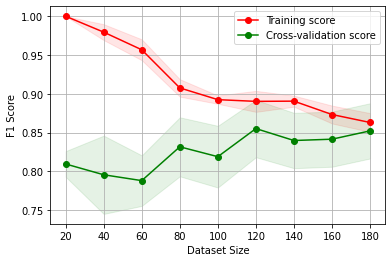

Train F1 score - size  20 - mean   1.000000 - scores                                             [1. 1. 1. 1. 1.]
Train F1 score - size  40 - mean   0.979487 - scores     [1.         0.97435897 0.97435897 0.97435897 0.97435897]
Train F1 score - size  60 - mean   0.956759 - scores     [0.94117647 0.93939394 0.96774194 0.96774194 0.96774194]
Train F1 score - size  80 - mean   0.907568 - scores     [0.92631579 0.91489362 0.8988764  0.8988764  0.8988764 ]
Train F1 score - size 100 - mean   0.892435 - scores     [0.90265487 0.88679245 0.89090909 0.89090909 0.89090909]
Train F1 score - size 120 - mean   0.890212 - scores     [0.88405797 0.88721805 0.86956522 0.90510949 0.90510949]
Train F1 score - size 140 - mean   0.890496 - scores     [0.90243902 0.88461538 0.88198758 0.89171975 0.89171975]
Train F1 score - size 160 - mean   0.873253 - scores     [0.87096774 0.85869565 0.86486486 0.88043478 0.89130435]
Train F1 score - size 180 - mean   0.862997 - scores     [0.86829268 0.84615385 0.851674

In [17]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring=None):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                                                            train_sizes=train_sizes, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    
    return train_scores, test_scores

def plot_f1_learning_curve(clf, X, y):
  train_sizes = [20, 40, 60, 80, 100, 120, 140, 160, 180]

  plt.xlabel("Dataset Size")
  plt.ylabel("F1 Score")
  train_scores, valid_scores = plot_learning_curve(clf, "Learning Curve of Logistic Regression", X, y, 
                                                  train_sizes=train_sizes, scoring="f1")
  plt.show()

  for train_size, scores in zip(train_sizes, train_scores):
    print("Train F1 score - size %3d - mean %10f - scores %60s" % (train_size, np.mean(scores), str(scores)))

  print()

  for train_size, scores in zip(train_sizes, valid_scores):
    print("Valid F1 score - size %3d - mean %10f - scores %60s" % (train_size, np.mean(scores), str(scores)))

plot_f1_learning_curve(clf, X_train_std, y_train)

We observe the following in the above graph:
- The mean training and validation F1 scores suggest that there is no overfitting. 
- However, there is some variance in the cross-validation F1 score, so if possible, we would like to reduce the variation. 
- We will aim for an arbitrary F1 score as a goal, say, 0.90 cross-validation F1 score. Based on this goal, the model is underfitting and we should improve the existing model's capacity or use a more advanced model.

## Exploratory Data Analysis
Now that we have our performance baseline, we will begin exploratory data analysis to have a deeper understand of the available data.

We wish to achieve the following with EDA:
1. Perform a comprehensive sweep of all the features with all EDA techniques
2. Check our assumptions about the relevance of each feature to the prediction target
3. Check the model assumptions for logistic regression (SVM, Random Forest Classifier, KNN have no testable model assumptions). 

### Univariate Study
We investigate the relationship that the target has with each of the input features. 

In [18]:
import seaborn as sns
import math
from scipy import stats

In [19]:
y_train.astype('object').describe()

count     242
unique      2
top         1
freq      132
Name: target, dtype: int64

In [20]:
X_train[numerical_cols].describe(include='all')

,age,trestbps,chol,thalach,oldpeak,slope,ca
count,242.000000,242.000000,242.000000,242.000000,242.00000,242.000000,242.000000
mean,54.413223,131.690083,244.066116,149.342975,1.01281,1.384298,0.743802
std,9.022949,17.492827,51.093233,23.220085,1.13538,0.622071,1.038902
min,34.000000,94.000000,126.000000,71.000000,0.00000,0.000000,0.000000
25%,48.000000,120.000000,209.500000,132.000000,0.00000,1.000000,0.000000
50%,55.000000,130.000000,239.000000,154.000000,0.60000,1.000000,0.000000
75%,61.000000,140.000000,269.750000,165.750000,1.60000,2.000000,1.000000
max,77.000000,192.000000,564.000000,195.000000,5.60000,2.000000,4.000000


In [21]:
X_train[object_cols].astype("object").describe(include='all')

,sex,cp,fbs,restecg,exang,thal
count,242,242,242,242,242,242
unique,2,4,2,3,2,4
top,1,0,0,1,0,2
freq,172,112,201,124,166,130


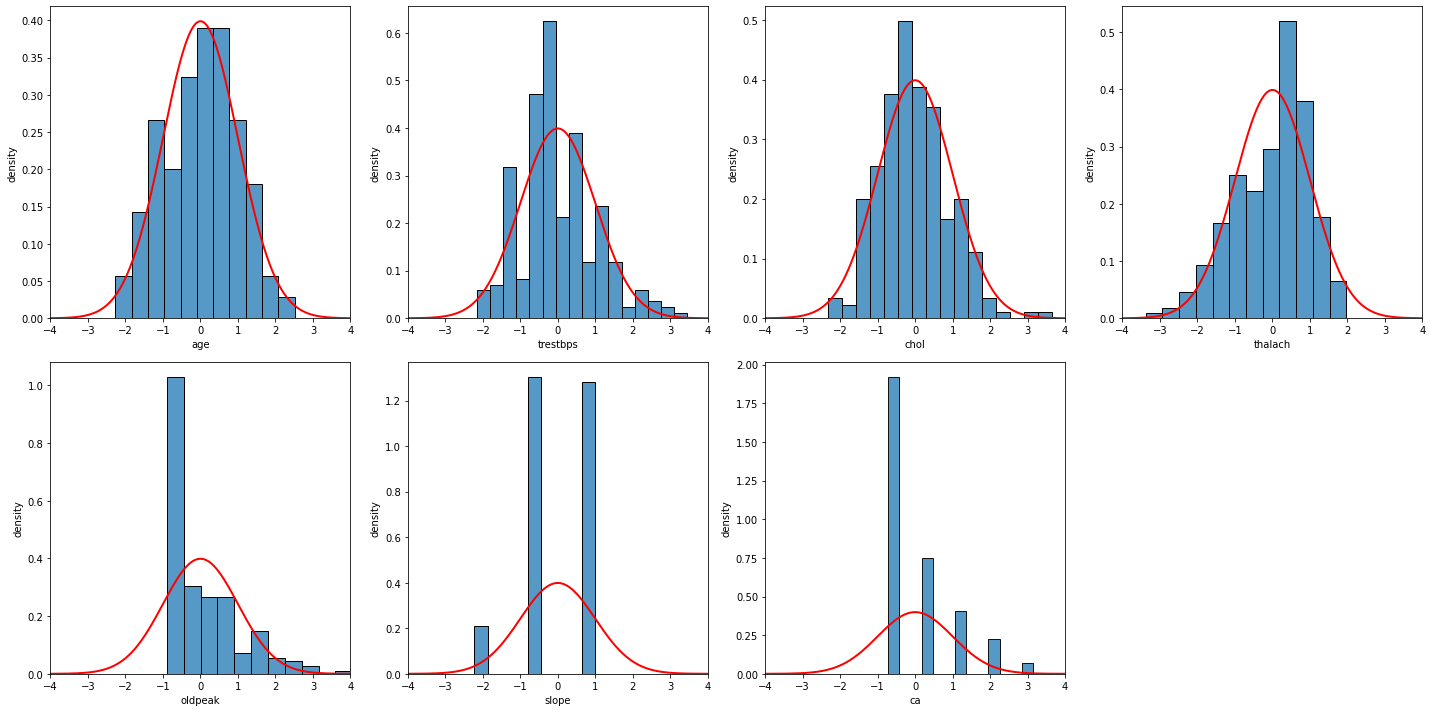

In [22]:
def plot_histogram(ax, x, xlabel=None, ylabel=None, title=None):
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  ax.set_xlim([-4.0, 4.0])
  sns.histplot(x=x, ax=ax, stat='density')

  # plot a normal curve
  xx = np.arange(-4, +4, 0.001)                                                   
  yy = stats.norm.pdf(xx)                                                         
  ax.plot(xx, yy, 'r', lw=2)  

def plot_distributions(x, features=None):
  if features is None:
    features = x.columns

  n_cols = 4
  n_rows = math.ceil(len(features) / n_cols)
  max_plots = n_rows * n_cols

  fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10 * n_rows, 10))

  for i in range(0, min(len(features), max_plots)):
    plot_histogram(ax[i // n_cols][i % n_cols], x[features[i]],
                   xlabel=features[i], ylabel='density')
    
  for i in range(max_plots - 1, -1 + len(features), -1):
    fig.delaxes(ax[i // n_cols][i % n_cols])
  
  plt.tight_layout()

plot_distributions(X_train_std, features=numerical_cols)

In [23]:
for feat in numerical_cols:
  print("%s skewness: %f" % (feat, X_train_std[feat].skew()))
  print("%s kurtosis: %f" % (feat, X_train_std[feat].kurt()))

age skewness: -0.111203
age kurtosis: -0.598063
trestbps skewness: 0.611318
trestbps kurtosis: 0.477021
chol skewness: 1.324899
chol kurtosis: 6.058001
thalach skewness: -0.612954
thalach kurtosis: -0.057292
oldpeak skewness: 1.152909
oldpeak kurtosis: 0.886121
slope skewness: -0.491071
slope kurtosis: -0.636846
ca skewness: 1.335788
ca kurtosis: 0.947718


The `.kurt()` method computes excess kurtosis, that is, ordinary kurtosis divided by 3. Then, the Normal distribution has an excess kurtosis of `0`. 

We make the following observations:

1. `age` somewhat fits the Normal distribution. The PDF curve is relatively close to the histogram and the skew is relatively close to 0. However, the Kurt is below what is expected of N(0,1) 
2. `trestbps` does not fit the Normal distribution. The histogram has many irregular peaks and does not fit with the Normal pdf. The skewness and kurtosis do not match either. 
3. `chol` does not ft the Normal distribution, according to the skewness and kurtosis measures. 
4. `thalach` does not fit the Normal distribution. It is clearly left-skewed.
5. `oldpeak` does not fit the Normal distribution. It has an extreme right skew, as well as a kurtosis that greatly departs from the Normal distribution 
6. `slope` appears to only have three possible values, so it might be better to treat this as an ordinal variable. 
7. `ca` might also be a candidate for an ordinal variable.

Hence, only `age` is roughly Normal. The `slope` and `ca` may be better treated as ordinal categorical features, however, we will treat them as equivalent to continuous variables for our analysis and preprocessing for simplicity. The remaining features do not follow a Normal distribution.

If it is necessary, then we might want to consider applying nonlinear transformations on the non-Normal features to enforce a normality assumption.

### Bivariate Study

#### Target vs. Categorical Variables
We compute the relative risk to assess the effect that each categorical variable has on the target.

In [24]:
for feat in object_cols:
  print("Feature: %s, Values: %s" % (feat, np.unique(X_train[feat])))

Feature: sex, Values: [0 1]
Feature: cp, Values: [0 1 2 3]
Feature: fbs, Values: [0 1]
Feature: restecg, Values: [0 1 2]
Feature: exang, Values: [0 1]
Feature: thal, Values: [0 1 2 3]


In [25]:
rel_risk = {}

print("Shape of _y_train: " + str(_y_train.shape))
print("Shape of X_train_std: " + str(X_train.shape))
print("Shape of combined: " + str(combined.shape))

def construct_contigency_table(data, x, y):
  df = []
  uniq_xs = np.unique(data[x])
  uniq_ys = np.unique(data[y])

  for target in uniq_ys:
    row = []
    for pred in uniq_xs:
      X_with_pred = data[data[x] == pred]                     # get all records in `data` with the specific value for the predictor
      X_with_target = X_with_pred[X_with_pred[y] == target]   # get all records in `X_with_pred` with the specified predictor AND target
      cell = len(X_with_target)                               # now count the number of records with `x=pred`, `y=target`
      row.append(cell)
    df.append(row)

  return pd.DataFrame(df).transpose()

# Computing the contigency tables
for feat in object_cols:
  rel_risk[feat] = construct_contigency_table(combined, feat, 'target')
  print("Feature: %s" % feat)
  print(rel_risk[feat])

Shape of _y_train: (242,)
Shape of X_train_std: (242, 13)
Shape of combined: (242, 14)
Feature: sex
    0   1
0  18  52
1  92  80
Feature: cp
    0   1
0  81  31
1   9  29
2  13  60
3   7  12
Feature: fbs
    0    1
0  91  110
1  19   22
Feature: restecg
    0   1
0  61  53
1  46  78
2   3   1
Feature: exang
    0    1
0  49  117
1  61   15
Feature: thal
    0    1
0   1    1
1   9    6
2  28  102
3  72   23


We can use Cramer's V to measure the associations between the `target` and the predictors `sex`, `cp`, `fbs`, `exang`.

For the features `restecg`, `thal`. There are not enough observations for `restecg = 2` and `thal = 0` (we need >1 observations for a cell). So we cannot reliably measure the association using Cramer's V. However, from a visual inspection, it appears that there is some association between `restecg` and `thal`, although the strength cannot be quantified. 

In [26]:
from scipy.stats import chi2_contingency

def cramers_v(cont_table):
  chi2 = stats.chi2_contingency(cont_table, correction=False)[0]
  N = cont_table.to_numpy().sum()
  k = np.min(cont_table.shape) - 1
  V = np.sqrt((chi2 / N) / k)
  return V

print("Cramer's V value for various features")
print("sex: %f" % cramers_v(rel_risk['sex']))
print("cp: %f" % cramers_v(rel_risk['cp']))
print("fbs: %f" % cramers_v(rel_risk['fbs']))
print("exang: %f" % cramers_v(rel_risk['exang']))

Cramer's V value for various features
sex: 0.252912
cp: 0.509999
fbs: 0.008045
exang: 0.473011


We make the following observations
1. `sex` appears to have a slightly less than moderate correlation with heart disease. This provides evidence against our assumption that `sex` has a moderate influence on the presence of heart disease. 
  
  A few explanations for this result might be that being male increases the risk of heart disease, due to genetic vulnerabilities from having XY chromosomes or sociological factors such as men having higher-paying positions, which entails a higher degree of responsibility and stress.

2. `cp` appears to have a moderate correlation with heart disease. This provides strong evidence against our assumption that chest pain would have a high influence on the presence of heart disease. 

  One possible explanation for this low score, is that chest pain is subjective, so a slow pain that indicates a heart attack and a slow pain that is harmless cannot be objectively distinguished by the reporter of the data. Hence, there is a lot of noise that weakens the association between `cp` and `target`

3. `fbs` has a very low correlation with heart disease. This provides very strong evidence against our assumption that `fbs` has a high influence on the presence of heart disease, in fact, the variables appear to be completely independent. 

  The original assumption that there would be a high association might have come from a misunderstanding of the problem domain. 

4. `exang` has a moderate correlation with heart disease. This provides strong evidence against our assumption that `exang` has a high influence on the presence of heart disease. 

  One possible explanation is that angina does not always progress to severe heart disease. Therefore, the association between `exang` and `target` is weaker than originally assumed.
  
  Hence, we might consider discarding `fbs` from the dataset to improve model performance. We will keep `sex`, `cp`, and `exang` since they appear to provide useful predictive information. We will also try to keep `thal` and `restecg` because there might be useful information in these features.

#### Target vs. Numerical Variables
To test an association between the categorical `target` and the numerical variables is more tricky. 

According to [this](https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365) article, we could use Pearson's correlation between `age` and `target`, since `age` appears to be somewhat Normal and only need to prove that `age` is homoscedastic. 

The remaining variables are problematic, because they do not follow Normal distributions. We cannot use Pearson's correlation and it is not clear how to Logistic Regression to illustrate strength of association for each individual predictor. This leaves the Kruskal-Wallis H Test, which, at most, tells a stochastic significance between `target` and the numerical variable, but not exactly how strong the association is. 

For simplicity, we will not test the assumptions of each numerical variable's significance to the target in this project. Instead, the chosen model will be relied upon to learn any possible associations. 

### Multivariate Study
We investigate the relationship between the different input features, e.g, identify correlations between numerical variables, determine relative risk between categorical variables, and determine any relationship between categorical and continuous variables

#### Numerical vs. Numerical
We plot the covariance matrix to identify redundant features

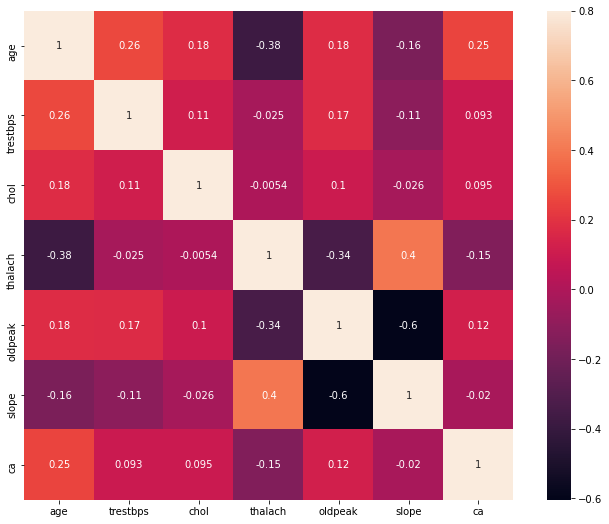

In [27]:
corrmat = combined.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

The correlation matrix suggests that there are no strong linear relationships between the features. There is, however, a moderate linear relationship between `oldpeak` and `slope`. There is also a weak relationship between `thalach` and `oldpeak`, `thalach` and `age`, as well as `thalach` and `slope`

We could consider dropping `slope` and `thalach`, leaving `oldpeak`, to see if that results in a measurable boost to model performance. 

Ultimately, there does not seem to be strong multicollinearity in the data.

#### Categorical vs. Categorical
We compute the relative risk to investigate the influence of one categorical variable on the other. We will use Cramer's V to measure correlation between two categorical features.

In [28]:
ocol_reverse_map = { feat: index for index, feat in enumerate(object_cols) }
print(object_cols)
print(ocol_reverse_map)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']
{'sex': 0, 'cp': 1, 'fbs': 2, 'restecg': 3, 'exang': 4, 'thal': 5}


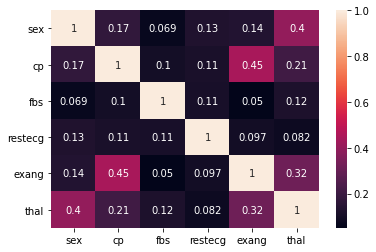

In [29]:
def corr_cat_cat(data, object_cols):
  matrix = []
  for row_feat in object_cols:
    row = []
    for col_feat in object_cols:
      tbl = construct_contigency_table(data, row_feat, col_feat)
      v = cramers_v(tbl)
      row.append(v)
    matrix.append(row)
  sns.heatmap(matrix, annot=True, xticklabels=object_cols, yticklabels=object_cols)

corr_cat_cat(combined, object_cols)

According to the above matrix, the pairs of features with the strongest correlation are `(exang, cp)`, `(thal, sex)`, `(exang, thal)`

We could consider discarding `exang`, `sex`, and keep only `thal` to see if that improves model performance. Although, the correlation does not appear to be strong, and so, the degree of multicollinearity may be weak. Thus, discarding these features might not make a significant difference.

#### Categorical vs. Continuous
We could use the F-test to measure correlation between categorical and continuous variables. However, for simplicity, we will not perform this test for the project. 

Instead we will use boxplots to identify any interesting relationships between features. 

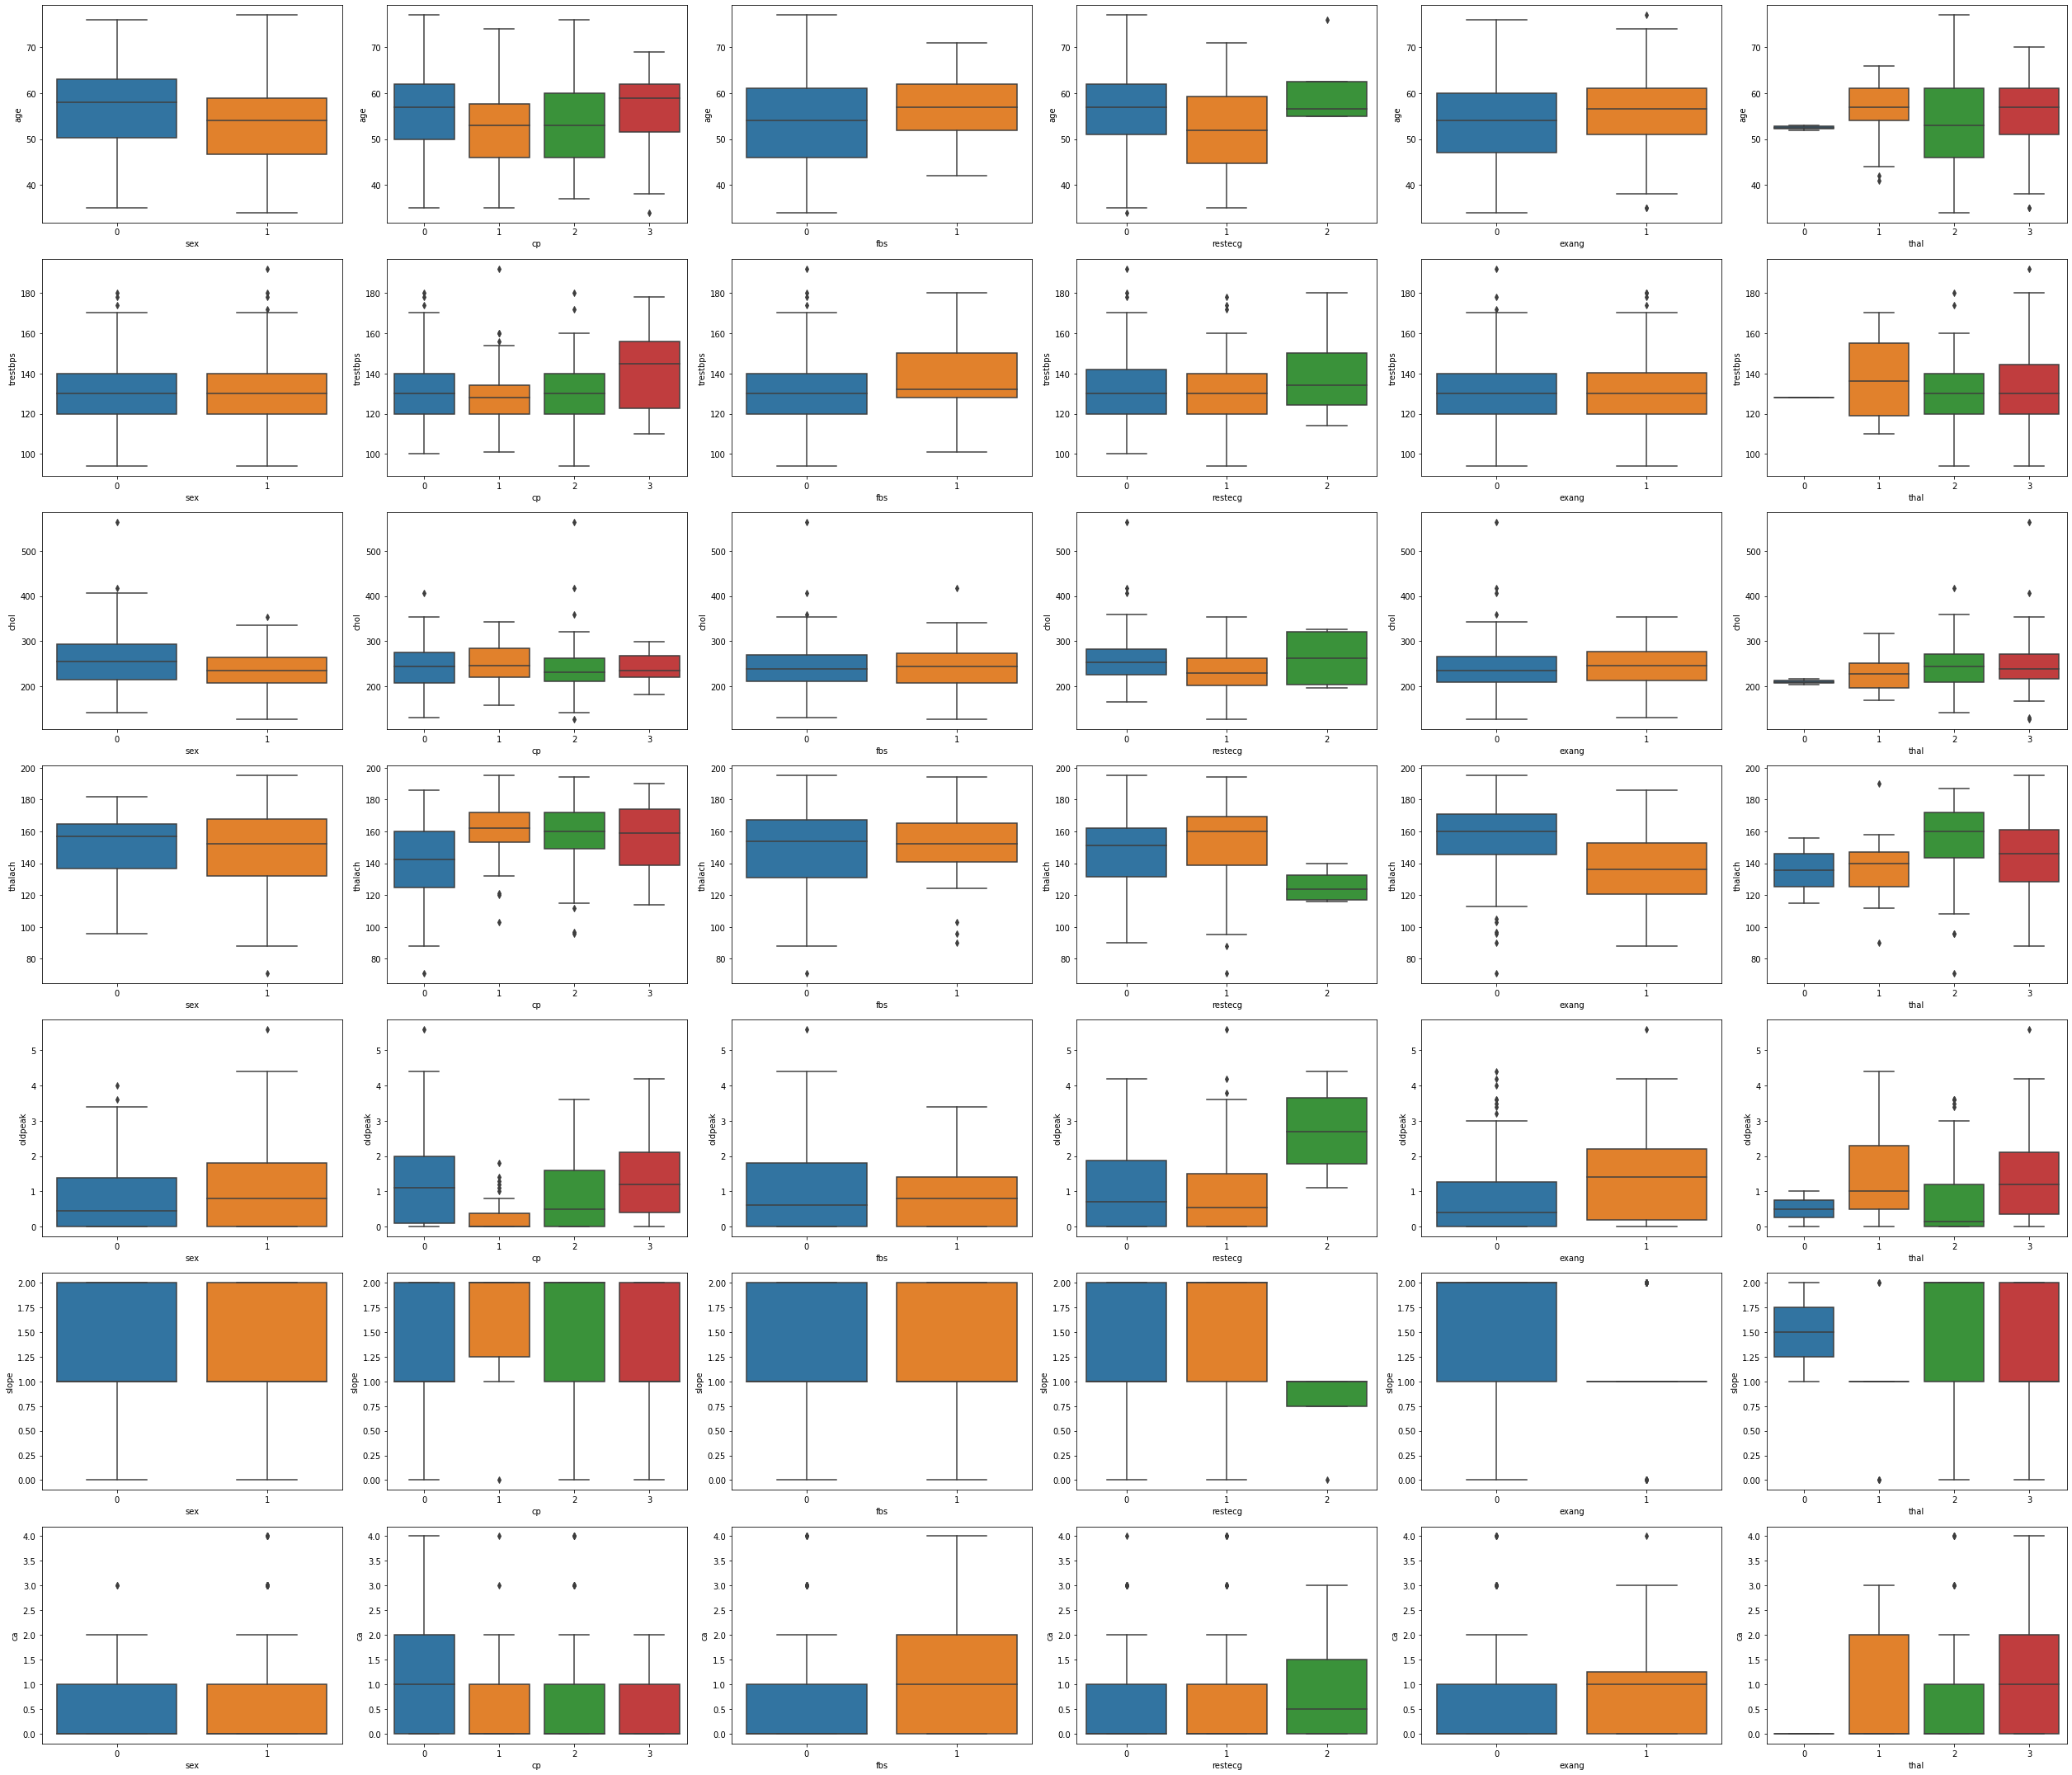

In [30]:
n_num_cols = len(numerical_cols)
n_obj_cols = len(object_cols)
fig, ax = plt.subplots(nrows=n_num_cols, ncols=n_obj_cols, figsize=(5 * n_num_cols, 5 * n_obj_cols))

for i, num_feat in enumerate(numerical_cols):
  for j, obj_feat in enumerate(object_cols):
    sns.boxplot(ax=ax[i][j], x=obj_feat, y=num_feat, data=X_train)

plt.tight_layout()

We see a few notable relationships:
1. In `chol` vs. `sex` - Males have less cholesterol than females on average.
2. In `thalach` vs. `sex` - Males have a higher range of maximum heart rates than females.
3. In `oldpeak` vs. `sex` - Males have a higher `oldpeak` on average. The `oldpeak` is associated with a diagnosis of a heart attack, by identifying an "ST depression." This suggests that are differences in the sexes, as to whether heart disease is present or not.
4. In `chol` vs `cp` - If more major vessels are coloured by fluoroscopy, i.e. `cp` increases, then the range of `chol` values is lower. One explanation is that if higher `chol` blocks blood vessels, then it reduces the number of major vessels that can be colored. 
5. In `age` vs. `fbs` - It appears that a narrower age range has a fasting blood sugar greater than 120mg/dl. 
6. In `trestbps` vs. `fbs` - It appears that a fasting blood sugar greater than 120mg/dl is associated with a higher resting blood pressure, on average.
7. In `thalach` vs. `fbs` - It appears that fasting blood sugar > 120mg/dl is associated with a higher maximum heart rate on average.
8. In `oldpeak` vs. `fbs` - A high fasting blood sugar is associated with a lower `oldpeak` on average. Since `oldpeak` is related to ST depressions, which is an indicator of heart attacks, it is possible that `fbs` does not provide valuable information by itself (as evidenced by its low Cramer's V score) but might be useful in tandem with other features like `oldpeak`
9. In `ca` vs. `fbs` - A higher number of major vessels coloured by fluoroscopy appears to be correlated with a high resting blood sugar. 
10. In the `restecg`, the `restecg = 2` boxes are associated with unusual behaviour that departs from the boxes where `restecg = 0` or `1`. This is likely due to the small number of records with `restecg = 2` distorting the graphs. 
11. In `X` vs. `exang` - The presence of angina after exercise correlates with a lower maximum heart rate (`thalach`), a higher ST depression induced by exercise relative to rest `oldpeak`, a lower `slope`, and higher number of blood vessels colored by fluoroscopy, on average. 
12. In `thalach` vs `thal` - The type of defect appears to affect the range of maximum heart rate. However, without proper documentation of the data, it is impossible to describe what type causes what effect on `thalach`

Some of the relationships are difficult to explain and requires more domain knowledge. 

#### General
We use a plot of all pairs of features, to identify any patterns.

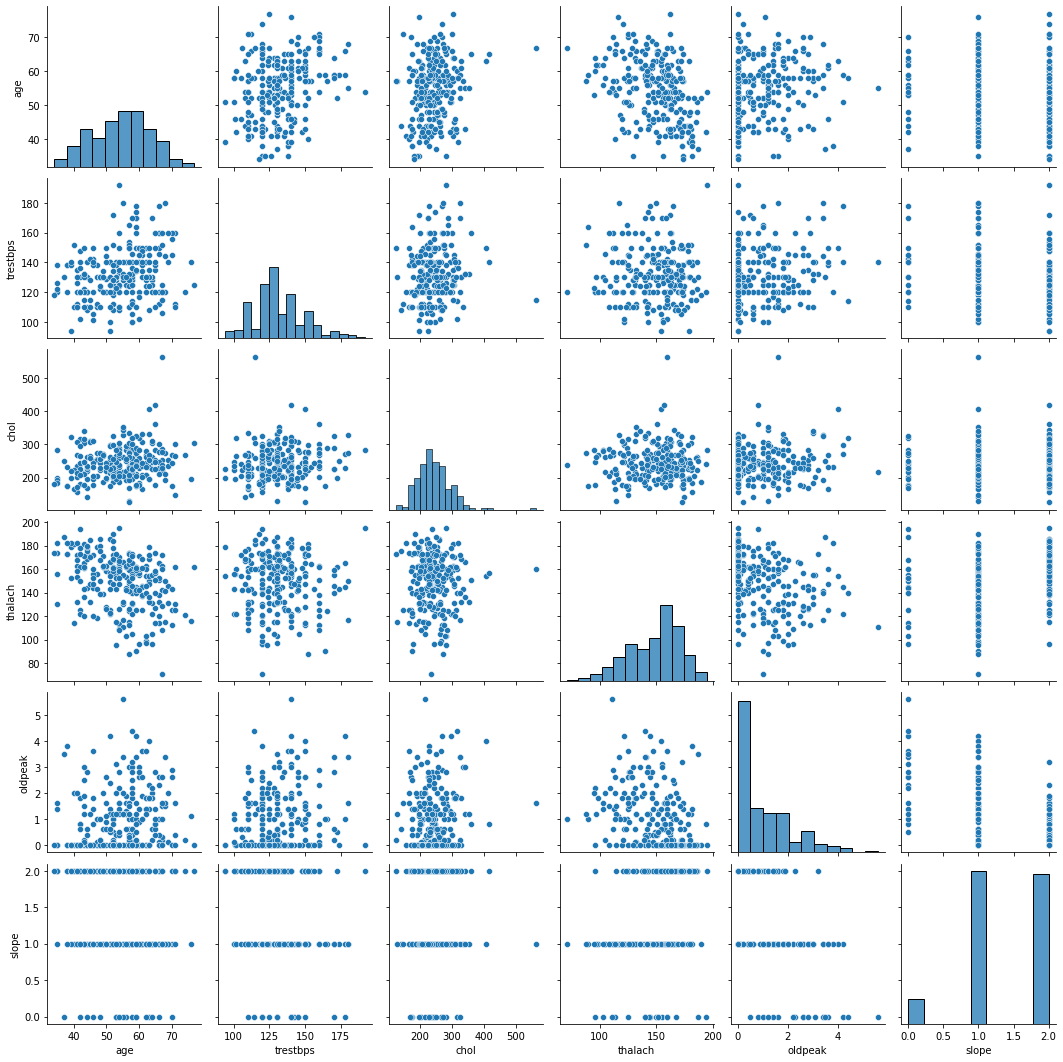

In [31]:
sns.pairplot(combined[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope']])

As shown in the "Numerical vs. Numerical" analysis, there is a moderate strength, negative linear relationship between `oldpeak` and `slope`. Examining the scatterplot, we see that a higher `slope` implies that the average `oldpeak` tends to be lower. 

Similarly, `thalach` and `oldpeak`, as well as `thalach` and `age` have weak linear relationships. The scatterplot of the latter pair confirms this correlation value, since it appears to have a right-downward trend. The scatterplot of the former has a less clear relationship. This behaviour could be explained by our health deteriorating as we age, hence, the maximum heart rate is affected. 

The scatterplot does not show a clear linear pattern and it the correlation coefficient might be influenced by a handful of outliers. Therefore, the low linear relationship in `thalach` and `oldpeak` might not be accurate.

Similarly, the scatterplot between `thalach` and `slope` does not show a clear relationship. It appears that `thalach` is lower on average if `slope = 1.0`, but this does not indicate a linear relationship. 

### Data Visualization
For curiosity, we compress the features into two dimensions with PCA, to identify any patterns between negative and positive class. This might help identify the decision boundary as being linear or non-linear. 

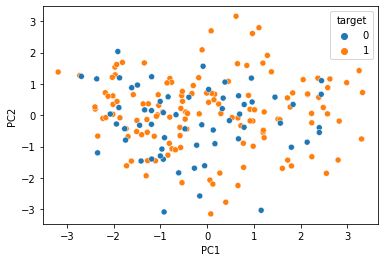

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2D = pd.DataFrame(pca.fit_transform(X_train_std), columns=['PC1', 'PC2'])

sns.scatterplot(x=X_2D['PC1'], y=X_2D['PC2'], hue=y_train)

In [33]:
import plotly.express as px

pca3 = PCA(n_components=3)
X_3D = pd.DataFrame(pca3.fit_transform(X_train_std), columns=['PC1', 'PC2', 'PC3'])

fig = px.scatter_3d(X_3D, x='PC1', y='PC2', z='PC3', color=y_train)
fig.show()

In 3D, there appears to be a "fuzzy" border which approximately separates the positive and negative examples. Assuming this border is present in the original, higher-dimensional dataset, then this indicates that there is no linear decision boundary that would achieve perfect accuracy. 

A Support Vector Machine or Neural Network would be useful for constructing such a nonlinear boundary. 

Note however, if the fuzzy border exists in higher dimensions, then for the SVM, there is overlap between the classes, so it may struggle to learn the relationship properly, due to a lack of a maximum margin in the dataset. 

### Validating Feature Assumptions
Using the previous section, we will stated whether assumptions are correct or not.



- The below table summarizes the results of EDA on the influence that the predictors might have in predicting the `target`

| Variable Name | Expectation | Actual  |
| ------------- | ----------- | ------- |
| `age`         | Medium      | ?       |
| `sex`         | Medium      | Medium  |
| `cp`          | High        | Medium  |
| `trestbps`    | High        | ?       |
| `chol`        | High        | ?       |
| `fbs`         | High        | Low     |
| `restecg`     | ?           | Medium? |
| `thalach`     | Medium      | Medium? |
| `exang`       | High        | Medium  |
| `oldpeak`     | High        | ?       |
| `slope`       | High        | ?       |
| `ca`          | High        | ?       |
| `thal`        | ?           | ?       |

- Normal variables: `age`
- Non-Normal variables: All other numeric features except `slope` and `ca`
- `slope` and `ca` behave more like ordinal categorical variables, as opposed to continuous features.



### Validating Model Assumptions
Here we will assess whether the data fits the model assumptions. This may give insight as to why a particular model is performing poorly. 

#### Logistic Regression
There are  six principle assumptions of logistic regression to verify:
1. No multicollinearity
2. Large sample size
3. Independent observations
4. Binary target
5. Linearity of predictors and logits
6. Not outliers



##### 1. Multicollinearity
This assumption is somewhat satisfied. 

From our Multivariate study, there is, at most, moderate correlation between features. Hence, the features are not totally redundant.

We will construct two logistic regression models, one which drops the moderately correlated features at preprocessing and one which does not, to empirically check if correlated columns should be dropped to improve performance.

##### 2. Large sample size
This assumption is somewhat violated.

A general rule of thumb is that "you need >= 10 events with the least frequent outcomes, for each independent variable."

As shown below and in our Univariate Analysis, the least frequent outcome is "0" (no heart disease) with 110 examples in the dataset. 

In total, there are 13 columns. Assuming these are all independent, then we would need 130 examples of class "0". This suggests that the assumption of large sample size might be violated, so the logistic regression model performs poorly.

However, as proposed in 1. Multicollinearity, we will attempt to drop collinear columns. By dropping at least 2 columns, we may also satisfy assumption 2. 

In [34]:
y_train.astype("object").describe()

count     242
unique      2
top         1
freq      132
Name: target, dtype: int64

In [35]:
len(numerical_cols) + len(object_cols)

13

##### 3. Independent observations
We cannot easily verify this assumption. One approach is to plot the data points vs. their order of collection. However, the data documentation does not indicate what the order of collection is. Thus, the plot is impossible to create. 

We will use the logistic regression model, but keep this assumption in mind.

##### 4. Binary target
This assumption is satisfied.

The descriptive summary shown above for `y_train` clearly indicates 2 unique classes for `target`

##### 5. Linearity of Predictors and Logits

This assumption is possibly violated.

We can make use of the baseline logistic regression model developed in the beginning, to compute the logits. 

In [36]:
# raw_proba[i][1] gives the probability of positive class membership for the i-th observation
raw_proba = clf.predict_proba(X_train_std)

# we will extract only raw_proba[i][1] to plot the logits
proba = raw_proba[:, 1]

In [37]:
plot_data = X_train_std.copy()
plot_data['logit'] = proba / ( 1 - proba )
plot_data

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex,cp,fbs,restecg,exang,thal,logit
0,0.176225,-0.096816,0.763596,-1.999951,0.518247,-2.229917,-0.717433,1.0,0.0,1.0,0.0,1.0,3.0,0.017211
1,0.398341,-0.211386,-0.550450,-0.791599,1.047799,-0.619052,2.176214,1.0,0.0,0.0,0.0,1.0,3.0,0.004339
2,-0.490125,-0.669664,-0.491612,0.373598,0.518247,-0.619052,-0.717433,0.0,2.0,0.0,1.0,0.0,2.0,23.462548
3,-0.045892,-1.242511,-0.099360,-1.007376,1.577352,-0.619052,0.247116,1.0,0.0,0.0,1.0,1.0,3.0,0.027262
4,-0.379066,0.476032,1.057785,-1.179998,2.812974,-0.619052,2.176214,1.0,0.0,0.0,1.0,1.0,3.0,0.001428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,-1.378590,-0.669664,-0.687739,1.020929,-0.893893,-0.619052,-0.717433,0.0,2.0,0.0,1.0,0.0,2.0,84.018689
238,-0.045892,-0.383240,0.567469,0.114665,-0.452600,-2.229917,0.247116,1.0,2.0,0.0,0.0,0.0,2.0,1.710070
239,1.175749,1.048879,-0.373937,-1.525241,-0.011306,-0.619052,2.176214,0.0,0.0,0.0,0.0,0.0,3.0,0.042905
240,-0.156950,-0.497809,0.743983,-2.345194,0.871282,-0.619052,1.211665,1.0,0.0,0.0,1.0,1.0,3.0,0.009628


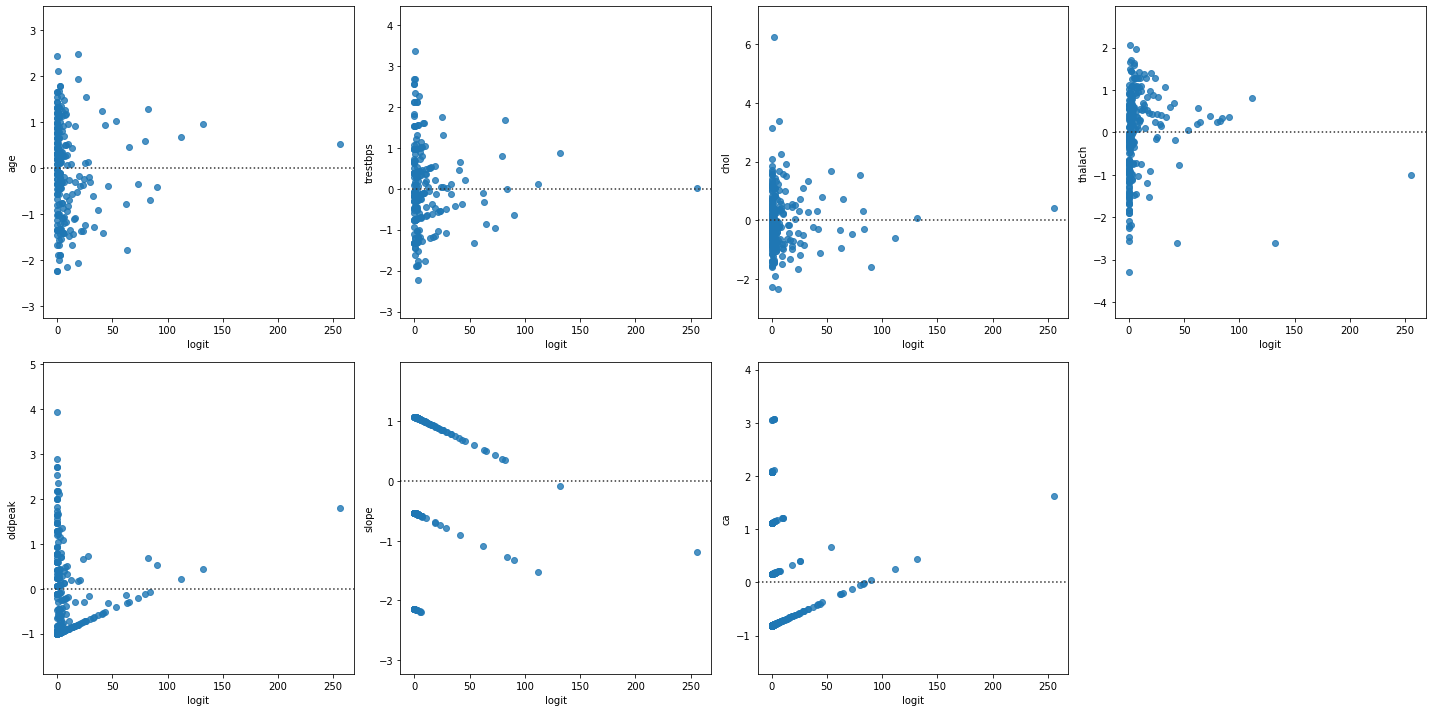

In [38]:
from scipy.signal import savgol_filter


fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for k, feat in enumerate(numerical_cols):
  i = k // 4
  j = k % 4

  epsilon = 1
  ymin = np.min(plot_data[feat] - epsilon)
  ymax = np.max(plot_data[feat] + epsilon)

  sns.residplot(ax=ax[i][j], data=plot_data, x='logit', y=feat)
  ax[i][j].set_ylim([ymin, ymax])

for k in range(2 * 4 - 1, len(numerical_cols) - 1, -1):
  i = k // 4
  j = k % 4
  plt.delaxes(ax[i][j])

plt.tight_layout()

According to the plot, there is a roughly linear relationship between `age`, `chol`, and `thalach`, with the `logit`s. The residuals appear to randomly scattered around $y=0$ on the graph. 

The `trestbps` and `oldpeak` graphs show peculiar behaviour, as some of the data points appear to form a straight line. This non-random pattern suggests that `trestbps` and `logits` are not in a linear relationship and so the assumption may be violated.

For `slope` and `ca`, they also show a non-random dispersion, but this might be blamed on the fact that `ca` and `slope` behave more like ordinal variables, which causes the residuals plot to be distorted. We ignore `slope` and `ca` for now. 



##### 6. No Outliers
We can identify outliers using Cook's Distance. 

In [39]:
# Installing package for Cook's idstance
!pip install -U yellowbrick
import yellowbrick

Requirement already up-to-date: yellowbrick in /usr/local/lib/python3.7/dist-packages (1.3.post1)


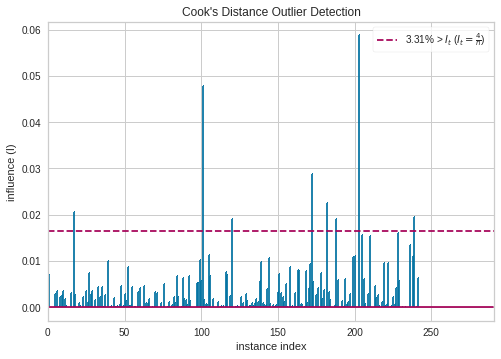

In [40]:
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete

X_num = X_train_std[numerical_cols]

# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(X_num, y_train.astype('int32'))
visualizer.show()


The Cook's Distance metric suggests that 8 data points are probably outliers. 

To remedy this, we could (1) continue with logistic regression anyways, (2) remove the outliers, or (3) perform a more detailed investigation of the outliers. 

For simplicity, we will proceed with logistic regression with the outliers.

#### KNN, SVM, Random Forest, and ANN

These models have the nice property that they do not make strong assumptions over the data, except possibly the "typical" assumptions such as sampling must be representative and data points are independent, identically distributed.

## Data Preprocessing and Feature Engineering

### Models
Recall from our previous analysis that we should consider the following logistic regression models:

1. Logistic regression with and without multicollinear columns
2. Logistic regression trained on a dataset with and without outliers

This yields 4 different combinations of logistic regression models, which require some data preprocessing.

Since the model is underfitting, we will evaluate multiple models. Such as:

1. K-Nearest Neighbors
2. Support Vector Machine
3. Random Forest Classifier
4. ANN with 1 hidden layer 

These models will not have a preprocessing layer in their pipeline.

### Missing Values

There are no missing values in this dataset, therefore, we will not use techniques like imputing

### Categorical Variables

The categorical variables in `object_cols` are all nominal and have at most 4 unique values. Therefore, they are prime candidates for one-hot encoding. 

The variables `slope` and `ca` are discrete integers. We might consider them categories, however, their values have an ordering, so we will leave these features as-is.

## Model Selection

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnDropper(BaseEstimator, TransformerMixin):
  def __init__(self, dropped_cols): 
    self.dropped_cols = dropped_cols
    
  def fit(self, X, y = None):
    return self
  
  def transform(self, X, y = None):
    return X.drop(self.dropped_cols, axis=1)

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

### Logistic Regression - with multicollinear
lr1 = Pipeline(steps=[('standard_scaler', StandardScaler()),
                      ('logistic_regression', LogisticRegression())])

### Logistic Regression - without multicollinear V1
collinear_num = ['slope', 'thalach']
collinear_obj = ['exang', 'sex']
lr2 = Pipeline(steps=[('no_multicollinear', ColumnDropper(collinear_num)),
                      ('standard_scaler', StandardScaler()),
                      ('logistic_regression', LogisticRegression())])

### Logistic Regression - without multicollinear V2
lr3 = Pipeline(steps=[('no_multicollinear', ColumnDropper(collinear_obj)),
                      ('standard_scaler', StandardScaler()),
                      ('logistic_regression', LogisticRegression())])

### Logistic Regression - without multicollinear V3
lr4 = Pipeline(steps=[('no_multicollinear', ColumnDropper(collinear_obj + collinear_num)),
                      ('standard_scaler', StandardScaler()),
                      ('logistic_regression', LogisticRegression())])

### K-Nearest Neighbors Classifier
knn = Pipeline(steps=[('standard_scaler', StandardScaler()),
                      ('knn', KNeighborsClassifier())])

### Support Vector Machines
rbf_svc = Pipeline(steps=[('standard_scaler', StandardScaler()),
                          ('svc', SVC(kernel='rbf'))])

lin_svc = Pipeline(steps=[('standard_scaler', StandardScaler()),
                          ('svc', SVC(kernel='linear'))])

### Random Forest Classifier
rf = RandomForestClassifier()

### Artificial Neural Network - 1 layer
ann = Pipeline(steps=[('standard_scaler', StandardScaler()),
                      ('ann', MLPClassifier(hidden_layer_sizes=(len(object_cols) + len(numerical_cols))))
])

### All models
models = {
    'lr1' : {
        'model' : lr1
    },
    'lr2' : {
        'model' : lr2
    },
    'lr3' : {
        'model' : lr3   
    },
    'lr4' : {
        'model' : lr4
    },
    'knn' : {
        'model' : knn
    },
    'rbf_svc' : {
        'model' : rbf_svc
    },
    'lin_svc' : {
        'model' : lin_svc
    },
    'ann' : {
        'model' : ann
    }

}

In [47]:
from sklearn.model_selection import cross_val_score, RepeatedKFold

cv_num = 10
n_repeats = 5
results = []

print("Repeated stratified %d-fold CV" % cv_num)
for model_name in models.keys():
  cv=RepeatedKFold(n_splits=cv_num, n_repeats=n_repeats, random_state=0)
  model = models[model_name]['model']
  score = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1, scoring='f1')

  results += [(model_name, np.mean(score))]

sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

for model_name, score in sorted_results:
  print("The average F1 score for %s is: %f" % (model_name, score))

Repeated stratified 10-fold CV
The average F1 score for lin_svc is: 0.839788
The average F1 score for knn is: 0.827432
The average F1 score for lr1 is: 0.823565
The average F1 score for ann is: 0.822821
The average F1 score for lr3 is: 0.822117
The average F1 score for lr2 is: 0.821931
The average F1 score for rbf_svc is: 0.814926
The average F1 score for lr4 is: 0.797830


In the code above, we use `RepeatedKFold` to execute repeated k-fold cross-validation. Ideally, this will reduce the variability in the F1 score in repeated runs of the cross-validation process and increase the reliability of the F1 score as an indicator of model performance.

Below, are the outputs of three different runs of the above code:

In [44]:
# Repeated stratified 10-fold CV
# The average F1 score for lin_svc is: 0.839788
# The average F1 score for knn is: 0.827432
# The average F1 score for lr1 is: 0.823565
# The average F1 score for ann is: 0.822591
# The average F1 score for lr3 is: 0.822117
# The average F1 score for lr2 is: 0.821931
# The average F1 score for rbf_svc is: 0.814926
# The average F1 score for lr4 is: 0.797830

We make the following observations: 
1. `lin_svc` appears to provide the best performance increase. The base model is `lr1` and there is a a `0.016` improvement in the F1 score. Moreover, the increase appears to be stable despite repeated executions of the model selection proces.

2. `knn` provides the next best performance increase, but offers only an improvement by about `0.004` at most. 

3. Models for logistic regression which removed columns from the dataset performed consistently worse than the baseline model. This suggests that multicollinearity might not be an issue and the predictive information in the features is worth keeping.

4. `ann`'s performance is slightly worse than the baseline logistic regression model. More investigation might be required to learn, but this is out of scope for the notebook.

Since a linear SVC does not suffer from violated model assumptions like logistic regression. It may be worthwhile to tune the linear SVC model as opposed to the logistic regression model. 

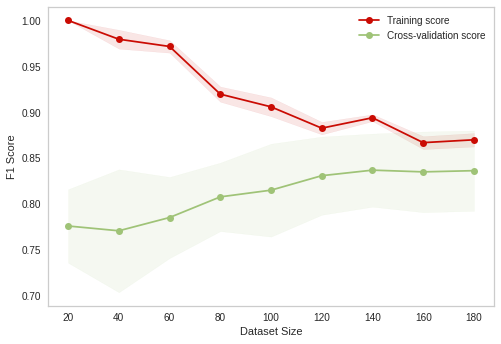

Train F1 score - size  20 - mean   1.000000 - scores                                             [1. 1. 1. 1. 1.]
Train F1 score - size  40 - mean   0.979487 - scores     [1.         0.97435897 0.97435897 0.97435897 0.97435897]
Train F1 score - size  60 - mean   0.971599 - scores     [0.98507463 0.96969697 0.96774194 0.96774194 0.96774194]
Train F1 score - size  80 - mean   0.919610 - scores     [0.91489362 0.93617021 0.91566265 0.91566265 0.91566265]
Train F1 score - size 100 - mean   0.905796 - scores     [0.90909091 0.9245283  0.89719626 0.89908257 0.89908257]
Train F1 score - size 120 - mean   0.882543 - scores     [0.88235294 0.87022901 0.88235294 0.88888889 0.88888889]
Train F1 score - size 140 - mean   0.893895 - scores     [0.90123457 0.89171975 0.89308176 0.89171975 0.89171975]
Train F1 score - size 160 - mean   0.866754 - scores     [0.86021505 0.86486486 0.85869565 0.87431694 0.87567568]
Train F1 score - size 180 - mean   0.869858 - scores     [0.87922705 0.86538462 0.861244

In [45]:
plot_f1_learning_curve(lin_svc, X_train, y_train)

From the above curve, the linear SVC appears to be suffering from a slight overfitting problem.

In [59]:
C_vals = [1, 0.5, 0.1, 0.05, 0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0.001]

cv_num = 10
n_repeats = 5

best_score = 0
best_index = None
for i, C in enumerate(C_vals):
  cv = RepeatedKFold(n_splits=cv_num, n_repeats=n_repeats, random_state=0)

  model = Pipeline(steps=[('standard_scaler', StandardScaler()),
                          ('svc', SVC(kernel='linear', C=C))])
  
  score = np.mean(cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1, scoring='f1'))

  if score > best_score:
    best_score = score
    best_index = i

  print("The score for C = %f is: %f" % (C_vals[i], score))

print("The best score is C = %f with %f" % (C_vals[best_index], best_score))

The score for C = 1.000000 is: 0.839788
The score for C = 0.500000 is: 0.840215
The score for C = 0.100000 is: 0.832116
The score for C = 0.050000 is: 0.829574
The score for C = 0.010000 is: 0.842330
The score for C = 0.009000 is: 0.842509
The score for C = 0.008000 is: 0.841289
The score for C = 0.007000 is: 0.840028
The score for C = 0.006000 is: 0.838303
The score for C = 0.005000 is: 0.841313
The score for C = 0.001000 is: 0.716447
The best score is C = 0.009000 with 0.842509


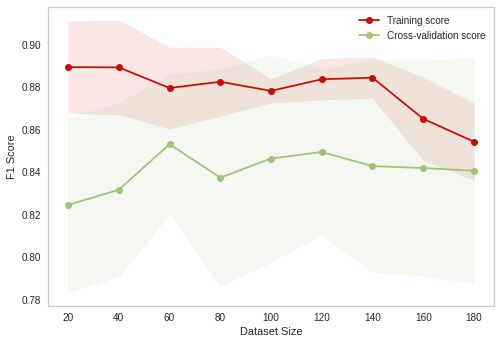

Train F1 score - size  20 - mean   0.889231 - scores     [0.84615385 0.9        0.9        0.9        0.9       ]
Train F1 score - size  40 - mean   0.889106 - scores     [0.93333333 0.87804878 0.87804878 0.87804878 0.87804878]
Train F1 score - size  60 - mean   0.879403 - scores     [0.91428571 0.88571429 0.86567164 0.86567164 0.86567164]
Train F1 score - size  80 - mean   0.882349 - scores     [0.90721649 0.89583333 0.86956522 0.86956522 0.86956522]
Train F1 score - size 100 - mean   0.878044 - scores     [0.88695652 0.87931034 0.86956522 0.87719298 0.87719298]
Train F1 score - size 120 - mean   0.883523 - scores     [0.88571429 0.87142857 0.87323944 0.89361702 0.89361702]
Train F1 score - size 140 - mean   0.884278 - scores     [0.88622754 0.8742515  0.87209302 0.89440994 0.89440994]
Train F1 score - size 160 - mean   0.864912 - scores     [0.8556701  0.84536082 0.84693878 0.88770053 0.88888889]
Train F1 score - size 180 - mean   0.854139 - scores     [0.84507042 0.83870968 0.836363

In [61]:
best_lin_svc = Pipeline(steps=[('standard_scaler', StandardScaler()),
                               ('svc', SVC(kernel='linear', C=C_vals[best_index]))])
plot_f1_learning_curve(best_lin_svc, X_train, y_train)

## Prediction
We have selected our model, so we will now train the model on both the training and validation data to potentially provide useful information for the test measure. 

In [67]:
from sklearn.metrics import f1_score, recall_score, precision_score
best_model = Pipeline(steps=[('standard_scaler', StandardScaler()),
                             ('svc', SVC(kernel='linear', C=C_vals[best_index]))])

best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)
f1 = f1_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
print("The final F1 score is %f" % f1)
print("The final precision is %f" % precision)
print("The final recall is %f" % recall)

The final F1 score is 0.845070
The final precision is 0.789474
The final recall is 0.909091


Hence, the final F1 score is 0.845. The recall is 0.909, so about ~90.9% of the positive cases will be captured. This result might be underperforming, depending on the severity of the heart disease. An accuracy of 95% or 99% is more desirable. 

## Improvements
A number of improvements could be made to this Notebook.

1. Use Kruskal-Wallis H Test, F-Test, or One-Way ANOVA to measure the correlation between categorical and continuous features, or between continuous predictors and the categorical target.
2. Learn better methodology to handle the case where "No Outliers" and "Linearity" in logistic regression are violated. 
3. For Logistic Regression, perform a CV grid search by training the classifier with and without outliers to see if that improves performance.